In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('concrete.csv')

In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
df.shape

(1030, 9)

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


We notice that the count at each of the 9 columns is 1030 which is equal to the total count for the values for each attribute, we can safely conclude that there are no missing values in this Dataset.

# Univariate analysis

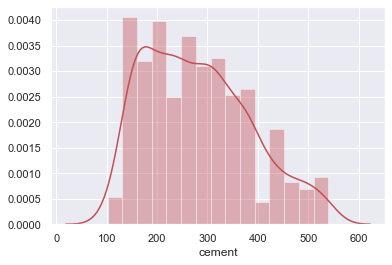

In [71]:
sns.distplot(df['cement'], kde='True', color='r')

In [72]:
df['cement'].median()

272.9

`First we have the attribute - 'Cement'
It is a one of the 9 ingredients which go into making Concrete. It is measured in kg within a m3 mixture.
It has values ranging from 102kg - 540kg, It has it's mean at 281.16 and median at 272.9, standard deviation is of 104.50, The Q1 lies at 192.375, Q2 at 272.900, Q3 at 350.000, The distribution is Gaussian with a slight skew at the Right, the presence of the Tail suggest that there are values present at that region. As mentioned earlier there are no Missing values, but there will be Outliers as there are visible tails of the distribution.`


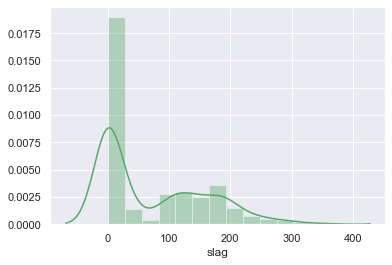

In [73]:
sns.distplot(df['slag'], color='g')

In [74]:
df['slag'].median()

22.0

    Slag is the second attribute it is often commonly known as Blast in the Cement Industry.It too is a key ingredient in the making of Concrete. Essentially a stony waste matter separated from metals during the smelting or refining of ore.It is measured in kg within a m3 mixture. It has values which range from 0 to 359.40 .It has a mean at 73.895825 and a Median at 22. The Standard deviation is at 86.279342. Q1 lies at 0, Q2 lies at 22.0 and Q3 at 142.950. The distribution has many peaks and valleys which may indicate that there might be high variance within the data points.There are no missing values but there could be a significant number of Outliers as seen with the presence o the Tail towards the right side.
   

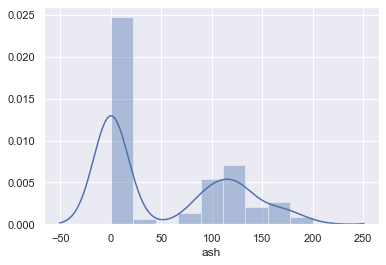

In [70]:
sns.distplot(df['ash'], color='b')

In [69]:
df['ash'].median()

0.0

`Ash is the third indgredient which goes into making concrete. When used in concrete mixes, fly ash improves the strength and segregation of the concrete and makes it easier to pump. It has it's range from 0 to 200.1. Mean value is at 54.188350 and the median is at 0. The SD value is 63.997004. Q1 lies at 0, Q2 lies at 0, Q3 lies at 118.3. The Distribution is Gaussian in patterns with a number of Peaks and valleys which would suggest that there is Variance within the data. There are not many outliers going by the figure but is a Tail at one end which rules out the Probability that there are no Outliers at all.`

In [ ]:
sns.distplot(df['water'], color ='y')

In [ ]:
df['water'].median()

Water is the fourth ingredient which goes into making of Concrete. It is measured in Litres within a m3 mixture. Range is from 121.80 to 247.0. 
Mean value- 181.567282
Median value - 185
Std dev. - 21.354219
Q1-164.900, Q2-185.000, Q3- 192.000	
The distribution pattern resembles a Gaussian curve with occurrences of some peaks and valleys.
There may not signifiant no. of outliers but there might be a few.

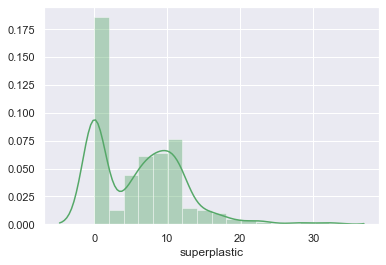

In [68]:
sns.distplot(df['superplastic'], color='g')

In [67]:
df['superplastic'].median()


6.4

Superplastic is the fifth ingredient which goes into making of Concrete. It is measured in Litres within a m3 mixture. 
Range - 0 to 32.2
Mean - 6.204660	
Median - 6.4
SD - 5.973841
Q1 lies at 0.000
Q2 lies at 6.400
Q3 lies at 10.200
There are two peaks in the distribution and the tail suggests that there are Outliers.


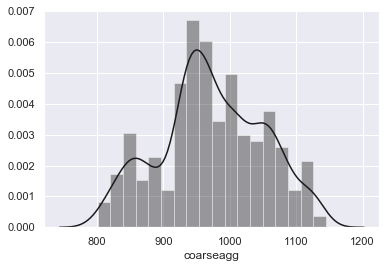

In [75]:
sns.distplot(df['coarseagg'], color='k')

In [76]:
df['coarseagg'].median()

968.0

Coarseagg is the an ingredient which comprises of large stones and it goes into making of Concrete. It is measured in Litres within a m3 mixture. 
Range -801.00 to 1145.0
Mean - 972.918932		
Median - 968.0
SD - 77.753954
Q1 lies at 932.000
Q2 lies at 968.000
Q3 lies at 1029.400
Gaussian distribution with less probability of Outliers.

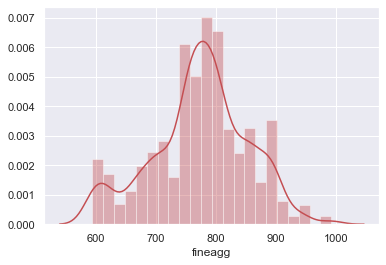

In [77]:
sns.distplot(df['fineagg'], color='r')

In [78]:
df['fineagg'].median()

779.5

Fineagg is the an ingredient which comprises of small stones and it goes into making of Concrete. It is measured in Litres within a m3 mixture. 
Range -594.00 to 992.6
Mean - 773.580485		
Median - 779.5
SD - 80.175980
Q1 lies at 730.950
Q2 lies at 779.500
Q3 lies at 824.000
Gaussian distribution with some probability for Outliers.

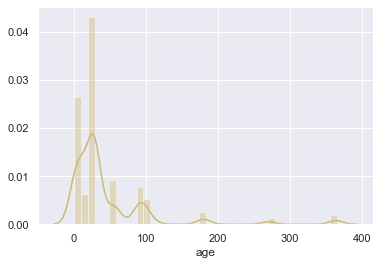

In [79]:
sns.distplot(df['age'], color='y')

In [80]:
df['age'].median()

28.0

Age is not an ingredient that goes into making of Concrete. It is measured in days between 1 to 365. 
Range - 1 to 365
Mean - 45.662136			
Median - 28
SD - 63.169912
Q1 lies at 7
Q2 lies at 28
Q3 lies at 56
Distribution has many peaks and valleys.

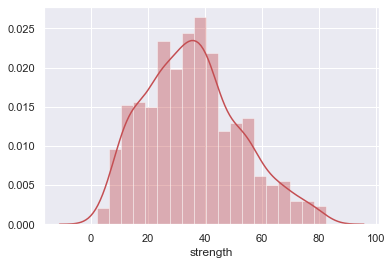

In [81]:
sns.distplot(df['strength'], color ='r')

In [82]:
df['strength'].median()

34.445

In [6]:
df0 =df.copy()

# Mutivariate analysis

In [83]:
X = df0.drop(['strength'],axis = 1)
y = df0['strength']

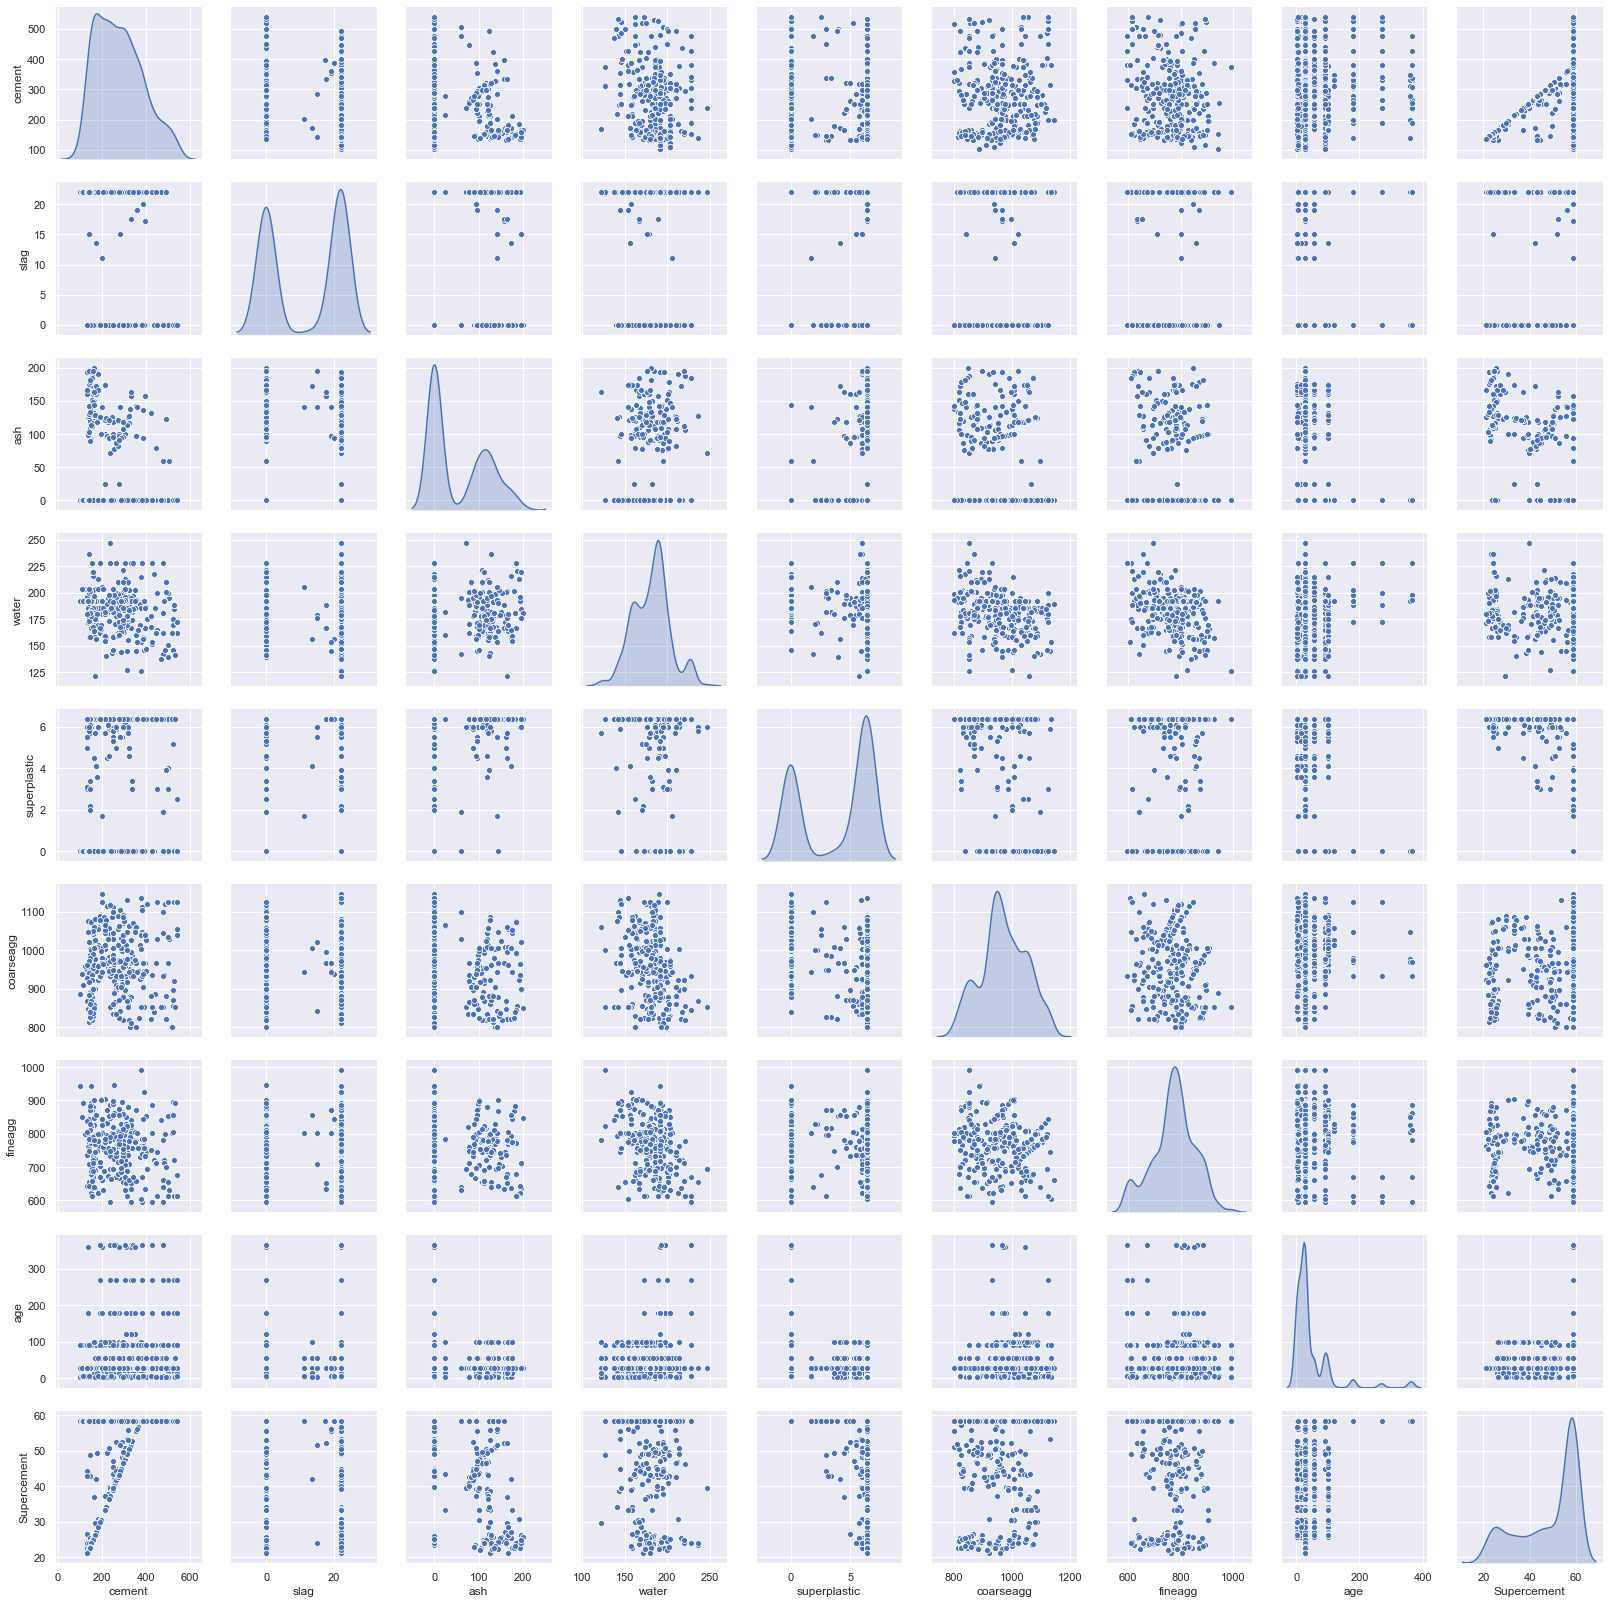

In [84]:
sns.pairplot(X, diag_kind= 'kde')


**Correlation Plot using HEAT MAP**

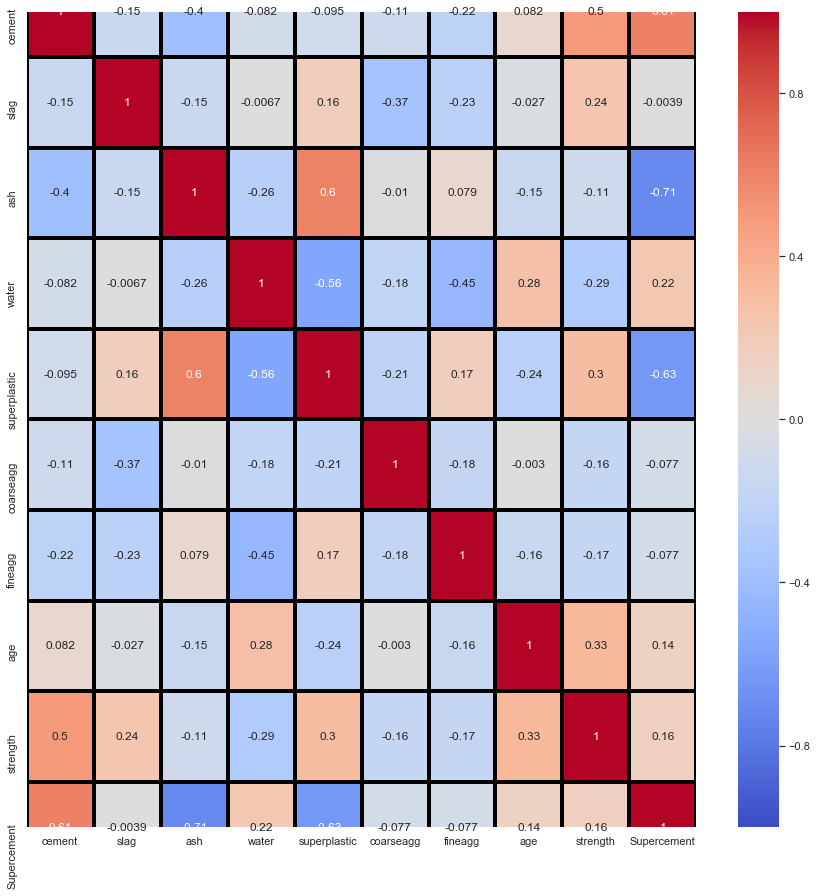

In [85]:
ax =fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df0.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black', ax=ax)

**Inferences from the Heat map**

**Cement** - It has a positive correlation with **Strength**

**Slag**- It has a Positive Correlation with **Strength**

**Ash** - It is Negatively Correlated with **Strength**

**Water** - It has a Negative Correlation with **Strength**

**Supersplastic** - It shares a Positive Correlation with **Strength**

**Coarseagg** - It shares a Negative Correlation with **Strength**

**Fineagg** _ It shares a negative correlation with **Strength**

**age** - It shares a Positive Correlation with **Strength**


# Addressing the Presence of Outliers

In [86]:
df0.isnull().values.any()


False

We do not have any Missing values at our Data Frame.


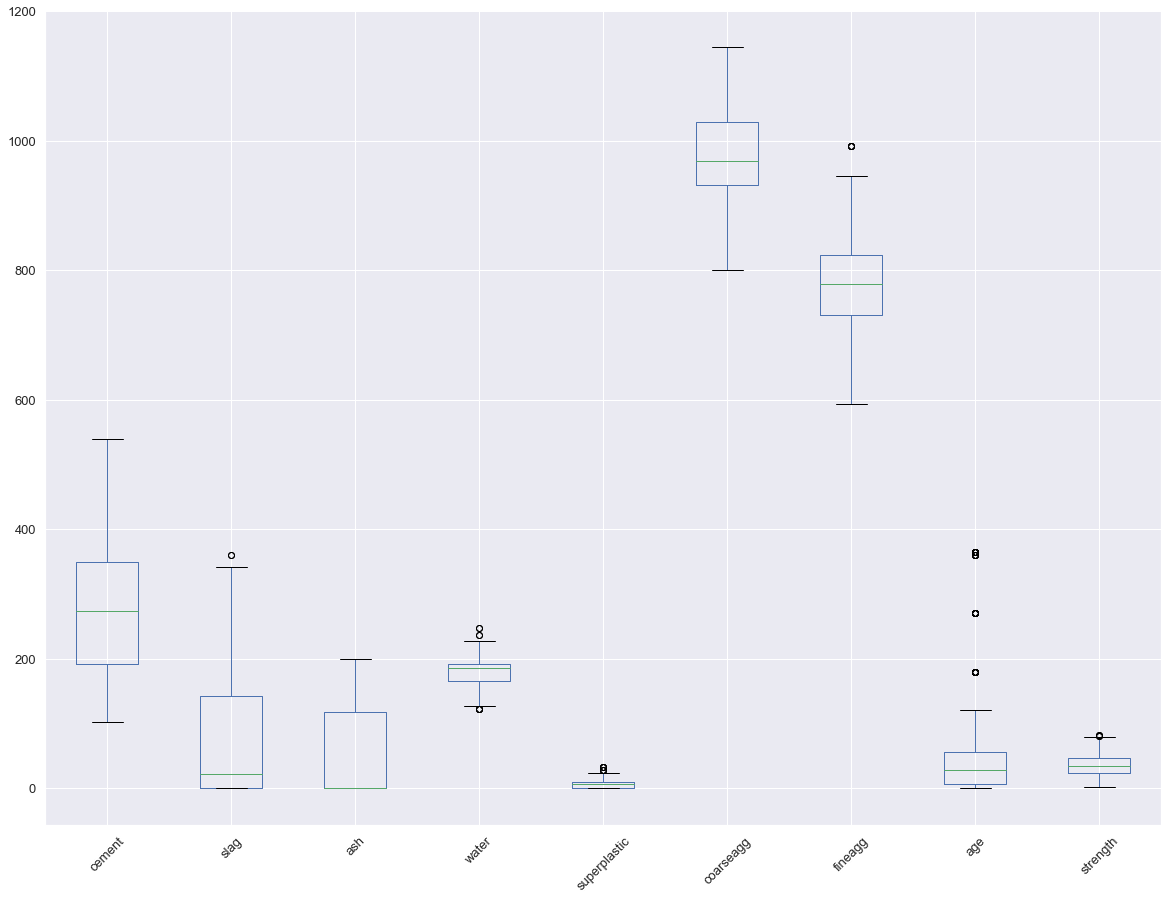

In [87]:
ax=df.boxplot(figsize=(20,15))
ax.set_xticklabels(ax.get_xticklabels(),rotation=45 )
ax.tick_params(axis='both', which='major', labelsize=13)
plt.show()

Replacing Outliers with the Median values of the respective columns.

In [88]:
median = float(df0['superplastic'].median())
df0["superplastic"] = np.where(df0["superplastic"] > median, median, df0['superplastic'])

In [89]:
median = float(df0['slag'].median())
df0["slag"] = np.where(df0["slag"] > median, median, df0['slag'])

In [91]:
median = float(df0['age'].median())
df0["age"] = np.where(df0["age"] > median, median, df0['age'])

**Note- For fineagg attribute we tried Imputing the Outlier values using Median and Mean but we ended up seeing a even greater number of Outliers, since the number of Outlier is only 1, we have decided upon keeping this in our data set.**

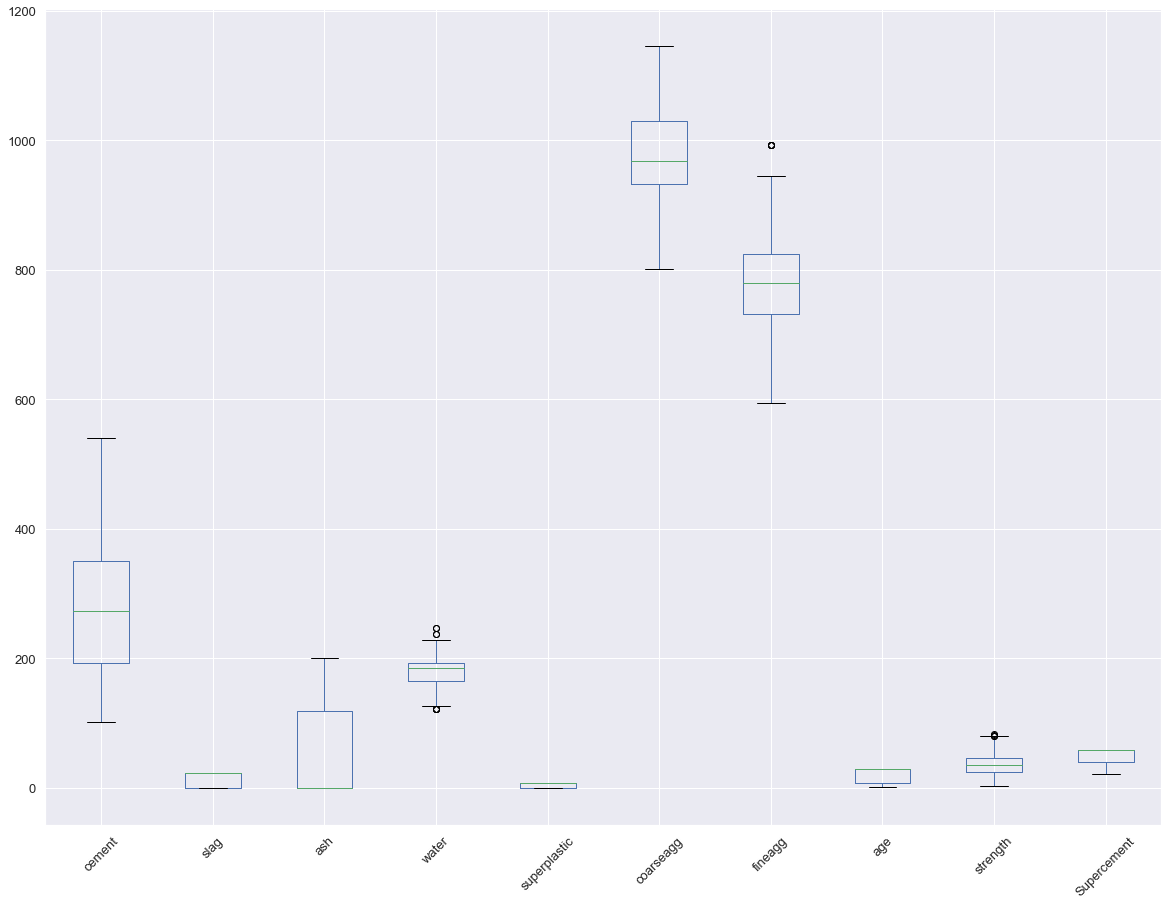

In [92]:
ax=df0.boxplot(figsize=(20,15))
ax.set_xticklabels(ax.get_xticklabels(),rotation=45 )
ax.tick_params(axis='both', which='major', labelsize=13)
plt.show()

# Feature Engineering

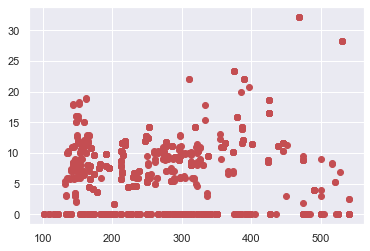

In [93]:
plt.scatter(x = df['cement'], y = df['superplastic'], color ='r')

## From the features we saw that both Cement and Superplastic have a Positive correlation with strength so decided upon making a *Composite Feature* out of it

In [9]:
df0 = df0.iloc[:, 0:9]
df0['Supercement'] = df0['cement'] / df0['superplastic']



In [94]:
median = float(df0['Supercement'].median())
df0["Supercement"] = np.where(df0["Supercement"] > median, median, df0['Supercement'])

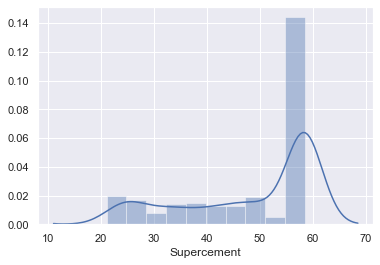

In [95]:
sns.distplot(df0['Supercement'])

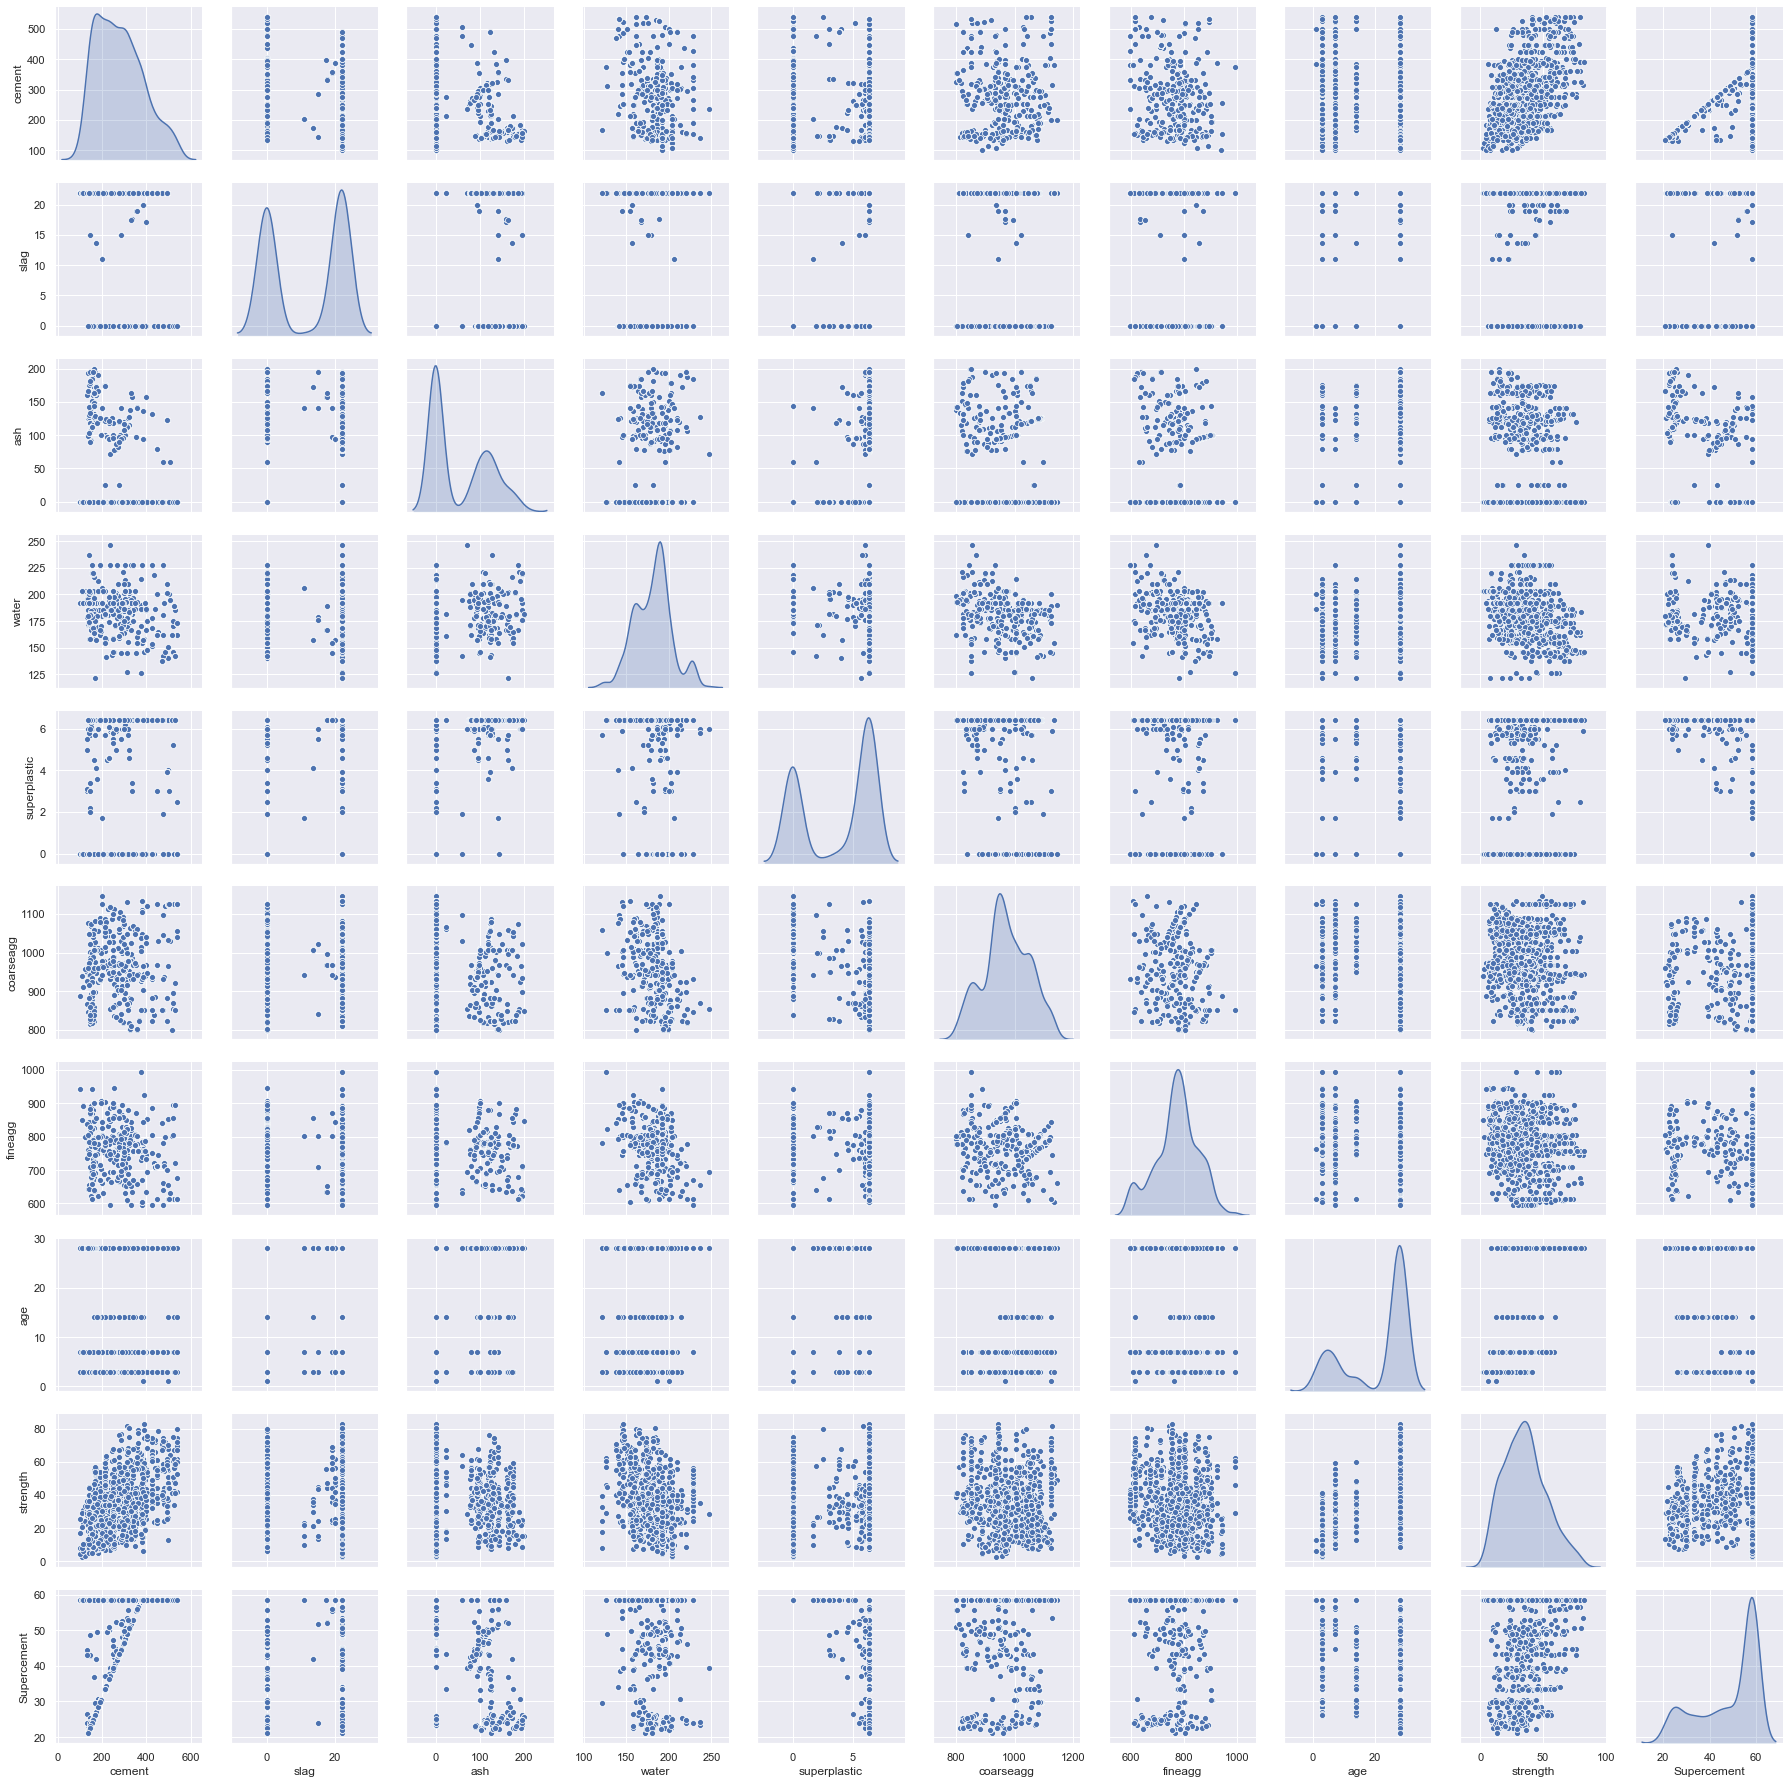

In [96]:
sns.pairplot(df0, diag_kind= 'kde')

In [97]:
df0.shape
#shape after adding the composite feature *Supercement*

(1030, 10)

In [98]:
df0.apply(zscore)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Supercement
0,-1.339017,0.944414,-0.847144,1.027590,-1.278554,-0.014398,-0.312970,0.660642,-0.355018,0.797417
1,-1.074790,0.944414,1.096078,-1.090116,0.850754,1.388141,0.282260,-0.716412,-0.737108,-1.737890
2,-0.298384,-1.083928,0.648965,0.273274,0.551320,-0.206121,1.093371,0.660642,-0.395144,-0.229696
3,-0.145209,0.944414,-0.847144,2.175461,-1.278554,-0.526517,-1.292542,0.660642,0.600806,0.797417
4,-1.209776,0.944414,-0.847144,0.549700,0.850754,0.958372,-0.959363,0.660642,-1.049727,-1.912184
...,...,...,...,...,...,...,...,...,...,...
1025,-1.399330,-1.083928,1.747988,-0.073430,0.850754,-0.153365,0.392072,0.660642,-1.349171,-2.156938
1026,2.394626,-1.083928,-0.847144,-1.863173,0.850754,-1.554617,1.498926,-1.798383,0.328312,0.797417
1027,-0.045645,0.944414,0.564545,-0.092171,0.850754,-1.323005,-0.065893,0.660642,0.506781,-0.409048
1028,0.582373,0.944414,-0.847144,2.175461,-1.278554,-0.526517,-1.292542,0.660642,1.152381,0.797417


In [99]:
df1 = df0[['cement','slag','ash','water','superplastic','coarseagg','fineagg', 'age' , 'Supercement' , 'strength']]


# Iteration 1 using Support Vector Regressor 

In [101]:
array = df1.values
X = array[:,0:8]
y = array[:,9]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [102]:
clr = svm.SVR()
clr.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [103]:
y_pred = clr.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


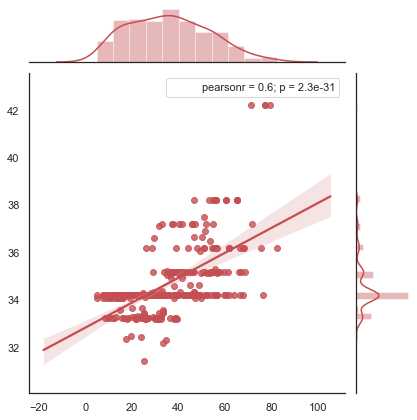

In [104]:
from scipy.stats import pearsonr

sns.set(style = "darkgrid", color_codes= True)
with sns.axes_style("white"):
    sns.jointplot(x = y_test, y = y_pred, kind = "reg", stat_func = pearsonr , color ='r')
    

We are getting a score of 60%

**Iteration 2 using Support Vector Regressor by dropping another column which is Age**

In [105]:
df1.pop("age")



0       28.0
1       14.0
2       28.0
3       28.0
4       28.0
        ... 
1025    28.0
1026     3.0
1027    28.0
1028    28.0
1029     7.0
Name: age, Length: 1030, dtype: float64

In [22]:
df1.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,Supercement,strength
0,141.3,22.0,0.0,203.5,0.0,971.8,748.5,58.437500,29.89
1,168.9,22.0,124.3,158.3,6.4,1080.8,796.2,26.390625,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,45.454545,29.22
3,266.0,22.0,0.0,228.0,0.0,932.0,670.0,58.437500,45.85
4,154.8,22.0,0.0,193.3,6.4,1047.4,696.7,24.187500,18.29


In [106]:
array = df1.values
X = array[:,0:7]
y = array[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [107]:
clr = svm.SVR()
clr.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


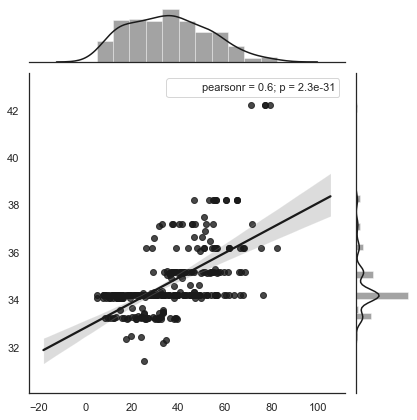

In [108]:
sns.set(style = "darkgrid", color_codes= True)
with sns.axes_style("white"):
    sns.jointplot(x = y_test, y = y_pred, kind = "reg", stat_func = pearsonr , color ='k')

**Inference - By dropping off the column age, we are not getting any impact on our score which stays at 60%**

# Analysis of the Gaussians

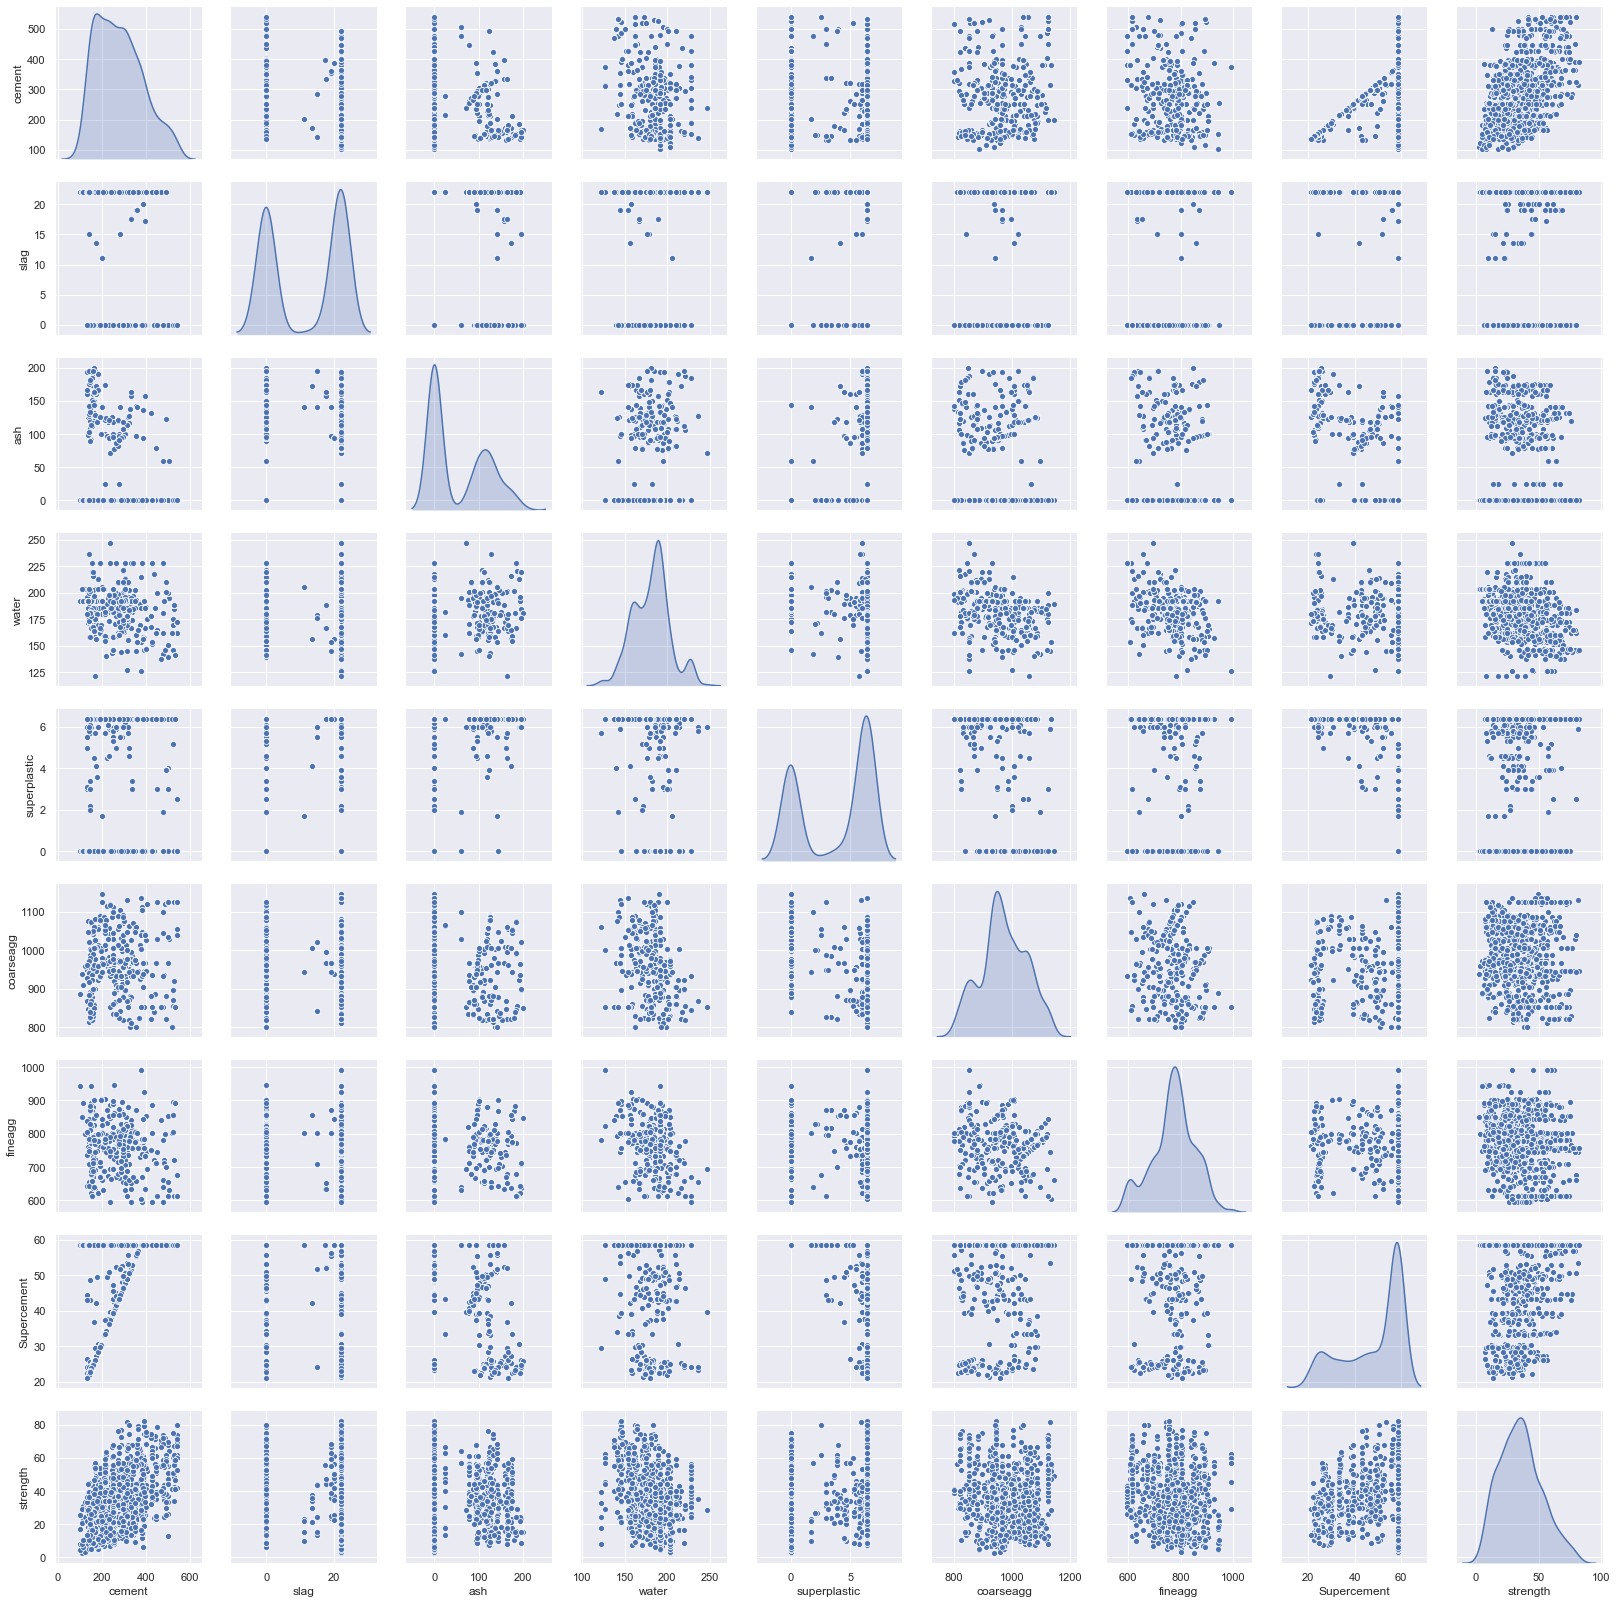

In [109]:
sns.pairplot(df1, diag_kind='kde')

From the pairplot analysis we see that the range would lie something in between 2 clusters to 4 x 3 = 12 clusters.



In [111]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

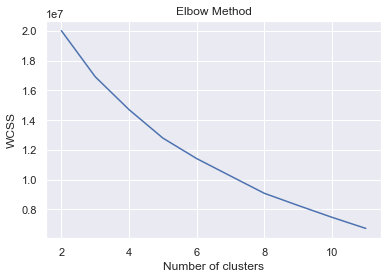

In [112]:
wcss = []
for i in range(2, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

So we are getting the probable number of clusters as either 5 or 8

# Feature Importance 

In [113]:
df2= df1[['cement','slag','ash','superplastic','coarseagg','fineagg', 'Supercement' , 'strength']]
#Re orienting the attributes


In [114]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 10, max_depth = 3)
regressor.fit(X_train, y_train)

imp_features = regressor.feature_importances_
feature_names = df2.columns[0:7]
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), regressor.feature_importances_), feature_names), 
             reverse=True))

Features sorted by their score:
[(0.5656, 'cement'), (0.3164, 'superplastic'), (0.0678, 'Supercement'), (0.0502, 'ash'), (0.0, 'slag'), (0.0, 'fineagg'), (0.0, 'coarseagg')]


In [115]:
y_pred = regressor.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


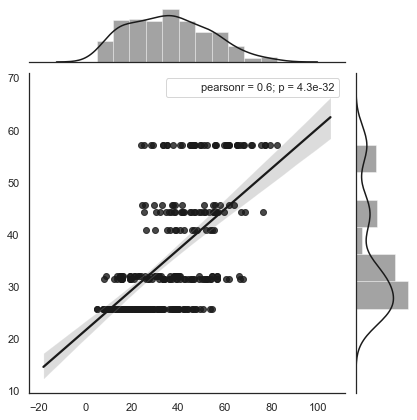

In [116]:
sns.set(style = "darkgrid", color_codes= True)
with sns.axes_style("white"):
    sns.jointplot(x = y_test, y = y_pred, kind = "reg", stat_func = pearsonr , color ='k')

**The performance of the Decision Tree Regressor is Same than that of SVR**

**Removal of the three feature(s) having values as 0**

In [117]:
X = df2.drop(['slag', 'fineagg', 'coarseagg'], axis= 1)
y = df2['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [ ]:
df2.head()

In [118]:
regressor1 = DecisionTreeRegressor(random_state = 10, max_depth = 3)
regressor1.fit(X_train, y_train)

imp_features = regressor.feature_importances_
feature_names = df2.columns[0:7]
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), regressor.feature_importances_), feature_names), 
             reverse=True))

Features sorted by their score:
[(0.5656, 'cement'), (0.3164, 'superplastic'), (0.0678, 'Supercement'), (0.0502, 'ash'), (0.0, 'slag'), (0.0, 'fineagg'), (0.0, 'coarseagg')]


In [119]:
y_pred = regressor1.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


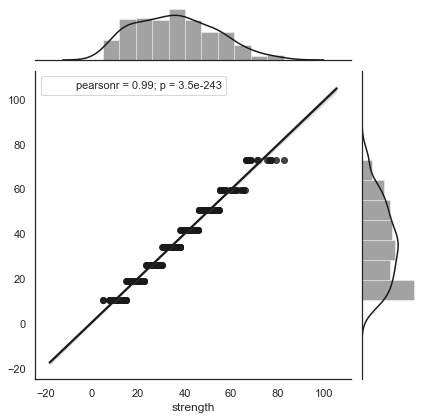

In [120]:
sns.set(style = "darkgrid", color_codes= True)
with sns.axes_style("white"):
    sns.jointplot(x = y_test, y = y_pred, kind = "reg", stat_func = pearsonr , color ='k')

Getting a very good post deleting the feature having less impact on Strength(Dependent variable)

# Simple Linear Model

In [122]:
X = df2.drop(['strength'], axis= 1)
y = df2['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [123]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for cement is 0.08510287183414446
The coefficient for slag is 0.3665941929332768
The coefficient for ash is -0.03561250258088662
The coefficient for superplastic is 2.2734239982348834
The coefficient for coarseagg is 0.010484871280319913
The coefficient for fineagg is 0.003398133460448391
The coefficient for Supercement is 0.020694942784197836


# Ridge regression

In [125]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha= 0.3)
ridge.fit(X_train, y_train)
print("Ridge Model:", ridge.coef_)


Ridge Model: [ 0.08510941  0.36662953 -0.03560623  2.27304764  0.0104845   0.00340233
  0.02063005]


# Lasso Regression

In [126]:
from sklearn.linear_model import Lasso 
lasso = Lasso(alpha= 0.2)
lasso.fit(X_train, y_train)
print("Lasso Model coeff:", lasso.coef_)

Lasso Model coeff: [ 0.08662293  0.37205349 -0.03462244  2.18708506  0.01015169  0.00420685
  0.00259893]


Many of the Coefficient of the Attributes are very close to Zero, due to the dimensionality reduction properties of Lasso Regression.

In [127]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))


0.45627654868792433
0.40931252003099783


In [128]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.45627654740491813
0.40931253117012084


In [129]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.4562044390146932
0.4090490940525947


# Polynomial Model to reflect on the non-linear relationship among dimensions

In [130]:
from sklearn.preprocessing import PolynomialFeatures

In [131]:
poly = PolynomialFeatures(degree = 2, interaction_only = True)


In [132]:
X_Poly= poly.fit_transform(df0)
X_train, X_test, y_train, y_test = train_test_split(X_Poly, y, test_size = 0.30, random_state = 1)

In [133]:
X_train.shape

(721, 56)

In [134]:
#Fitting into the Regression Model

regression_model.fit(X_train,y_train)
print(regression_model.coef_)

[-1.27225835e-12 -5.60578100e-13  1.10013669e-13 -1.40909962e-13
  2.62880402e-14 -2.47725042e-12 -4.32240032e-14  3.19884364e-15
 -2.03851421e-13  1.00000000e+00 -3.67459074e-13 -1.66768929e-16
  1.73778974e-16  7.25012769e-16  8.71872951e-15  1.78358034e-16
  2.46716981e-16  2.89942766e-16  5.77479958e-16  4.95000972e-16
 -6.70301217e-16  3.35599536e-16  2.77025573e-14  3.15502832e-16
 -6.79266214e-16 -2.40861527e-15  2.26496780e-15  1.97741959e-15
  1.96674274e-16 -5.08428138e-16  6.74915852e-17  4.51028104e-17
  2.27750219e-17 -9.17370563e-17 -1.05135847e-16 -3.02458737e-15
  3.27971157e-17 -4.13623129e-17 -5.08653449e-16 -2.93629053e-16
  4.14822527e-16 -1.41410456e-16 -2.06662487e-16  1.16587754e-15
  1.82409477e-15 -4.62714406e-16 -3.79470760e-19  9.09645623e-17
  1.58185097e-16  1.38310316e-16 -2.03450538e-16  1.02619736e-16
 -4.34087445e-16 -2.68336650e-16  3.26375347e-16  1.55855756e-16]


In [135]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

1.0
1.0


The magnitude of the attributes is very high where the model would tend to be at the Overfit zone

In [137]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha= 0.3)
ridge.fit(X_train, y_train)
print("Ridge Model:", ridge.coef_)

Ridge Model: [ 0.00000000e+00  1.18289193e-03  6.10605380e-03 -7.41757255e-04
  6.17619160e-04  2.38435708e-02  9.20226803e-05  2.07992559e-04
  1.79498843e-02  9.80228475e-01  2.50984035e-03 -2.80107593e-07
  2.40628898e-08 -2.30638407e-06 -1.86145467e-05 -3.30741706e-07
 -2.93262630e-07 -3.30899703e-06  2.89086217e-06 -3.59879340e-06
 -1.63934966e-07 -8.60001306e-06 -9.12540046e-05 -2.26234693e-06
 -1.36343608e-06 -2.82126320e-05  2.67844769e-05 -2.46608019e-05
  8.93414209e-07 -6.81963483e-07  2.41644091e-07  4.62873469e-07
 -3.97381625e-06  4.10383386e-06 -1.76895923e-06 -1.58425855e-05
 -2.12759184e-08 -4.77588691e-07 -2.55343409e-05  2.80591519e-05
  1.77300014e-06 -8.13717639e-06 -1.45229245e-05 -1.00377954e-04
  1.21496407e-04  4.65695095e-05 -2.15098413e-08 -6.06886195e-06
  6.68963120e-06 -8.95730935e-07 -6.55957997e-06  6.94076956e-06
 -1.59868977e-06  3.50046012e-06 -1.17139006e-05  1.86553693e-05]


In [138]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.9999999719462921
0.9999999608254635


In [139]:

from sklearn.linear_model import Lasso 
lasso = Lasso(alpha= 0.2)
lasso.fit(X_train, y_train)
print("Lasso Model coeff:", lasso.coef_)

Lasso Model coeff: [ 0.00000000e+00 -3.80439927e-03 -0.00000000e+00 -4.11521243e-04
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  1.13270028e-01  0.00000000e+00 -2.70117896e-05
 -4.11648528e-05 -1.69153916e-05  3.44498396e-04  3.85788658e-06
  6.37383603e-06 -7.71240210e-05  2.45246175e-04 -1.31234951e-04
 -7.16192815e-05 -1.45030204e-04 -0.00000000e+00 -1.41323397e-05
 -5.87967738e-06 -7.48106354e-05  1.79430044e-03 -1.45415334e-04
  3.10843244e-05  4.58834442e-04 -9.54832055e-06 -1.74800163e-06
 -2.04172409e-04  3.10138642e-04  1.69138820e-04 -0.00000000e+00
 -3.33864798e-05 -2.86401554e-05 -4.18419346e-05  1.39638916e-03
  2.30709314e-04 -6.86765408e-05 -2.32335396e-04 -0.00000000e+00
  3.36777115e-03  0.00000000e+00 -4.96707407e-06  2.35952743e-05
  2.89643200e-04 -2.17978678e-05  1.80689307e-05  2.82822220e-04
 -2.15641019e-05  2.13969951e-04 -4.81763480e-05  1.44010316e-04]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.11952488735381, tolerance: 19.723479181109575
  positive)


In [140]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.9997807573800832
0.9997690263310254


Ridge and Lasso Regression models do not Overfit to the extent of the Linear model with Polynomial features.


# Tuning of the hyperparameters of the model

In [141]:
#Hyperparameters available: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [142]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(regression_model,parameters,cv=10)


In [143]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [144]:
gs.cv_results_['params']

[{'copy_X': True, 'fit_intercept': True, 'normalize': True},
 {'copy_X': True, 'fit_intercept': True, 'normalize': False},
 {'copy_X': True, 'fit_intercept': False, 'normalize': True},
 {'copy_X': True, 'fit_intercept': False, 'normalize': False},
 {'copy_X': False, 'fit_intercept': True, 'normalize': True},
 {'copy_X': False, 'fit_intercept': True, 'normalize': False},
 {'copy_X': False, 'fit_intercept': False, 'normalize': True},
 {'copy_X': False, 'fit_intercept': False, 'normalize': False}]

In [145]:
gs.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

# Range estimate of the Model Performance.

Performance range estimate for our model is 94 - 99 %.


                                  -------*********--------------